<a href="https://colab.research.google.com/github/UrukHan/Numbers/blob/main/Cifri3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import argparse
import imutils
import json
import inspect
import matplotlib.pyplot as plt
%matplotlib inline 

In [1]:
import numpy as np
import os
import cv2
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def showImg(name):
  plt.imshow(name, cmap = 'gray', interpolation = 'bicubic')
  plt.show()

In [171]:
with open('numbers.pkl', 'rb') as f:
  numbers = pickle.load(f)

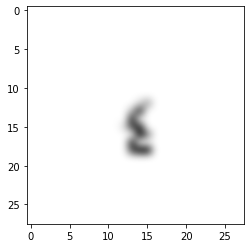

In [4]:
showImg(numbers['4'][0])

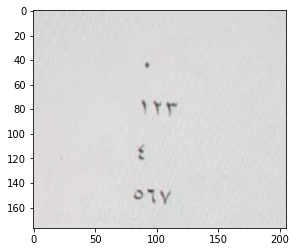

In [236]:
cifr = cv2.imread('/content/nnn.jpg')
showImg(cifr)

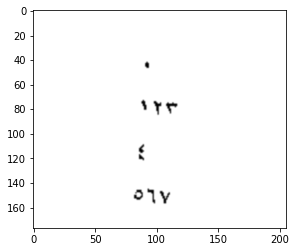

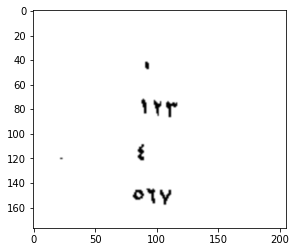

In [237]:
cifri = cv2.cvtColor(cifr, cv2.COLOR_BGR2GRAY)
cifriC = cv2.cvtColor(cifr, cv2.COLOR_BGR2GRAY)
ret, cifri = cv2.threshold(cifri, 170, 255, cv2.THRESH_BINARY)
ret, cifriC = cv2.threshold(cifriC, 200, 255, cv2.THRESH_BINARY)
showImg(cifri)
showImg(cifriC)

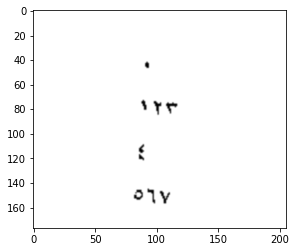

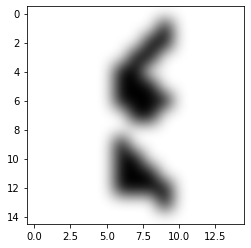

9


In [460]:
def numExtract(img, cif):
  letters = [] 
  showImg(img)
  
  contours, hierarchy = cv2.findContours(cif, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 0)
      letter_crop = img[y:y + h, x:x + w]
      size_max = max(w, h)
      letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
      if w > h:
        y_pos = size_max//2 - h//2
        letter_square[y_pos:y_pos + h, 0:w] = letter_crop
      elif w < h:
        x_pos = size_max//2 - w//2
        letter_square[0:h, x_pos:x_pos + w] = letter_crop
      else:
        letter_square = letter_crop
      #showImg(letter_square)
      ret, letter_square = cv2.threshold(letter_square, 127, 255, 0)
      letters.append((x, w, letter_square))
    letters.sort(key=lambda x: x[0], reverse=False)

  return letters

num = numExtract(cifri, cifriC)
showImg(num[2][2])
print(len(num))

In [461]:
def croupP(img, cif):
  letters = [] 
  showImg(img)
  
  contours, hierarchy = cv2.findContours(cif, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 0)
      letter_crop = img[y:y + h, x:x + w]
      size_max = max(w, h)
      letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
      if w > h:
        y_pos = size_max//2 - h//2
        letter_square[y_pos:y_pos + h, 0:w] = letter_crop
      elif w < h:
        x_pos = size_max//2 - w//2
        letter_square[0:h, x_pos:x_pos + w] = letter_crop
      else:
        letter_square = letter_crop
      #showImg(letter_square)
      ret, letter_square = cv2.threshold(letter_square, 127, 255, 0)
      letters.append((x, w, letter_square))
    letters.sort(key=lambda x: x[0], reverse=False)

  return letters

In [462]:
for i in range(len(num)):
  maximum = 0
  for k in numbersC.keys():
    numM = cv2.resize(num[i][2], (10, 10)) 
    numC = cv2.resize(numbersC[k][0], (10, 10))
    
    result = cv2.matchTemplate(numC, numM, cv2.TM_CCOEFF_NORMED)
    
    (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
    if max_val > maximum:
      maximum = max_val
      resultNumb = k
  if maximum > 0.6:
    print(resultNumb) 

0
1
0
6
2
7


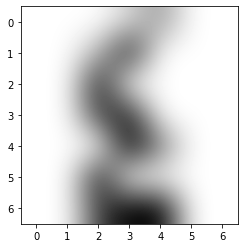

In [463]:
showImg(numbersC['4'][0])

In [464]:
cv2.imwrite(os.path.join('/content/Gener','img.jpg'), numbersC['4'][0])

True

In [465]:
from tensorflow.python.keras.models import Sequential
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [466]:
hz = cv2.resize(numbersC['4'][0], (28, 28))
allData = pd.DataFrame(np.append([4], hz).reshape(-1,)).T
allData.drop([0], inplace=True)
allData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784


In [467]:
for i in numbersC.keys():
  for j in range(len(numbers[i])):
    hz = cv2.resize(numbersC[i][j], (28, 28))
    allData = pd.concat([allData, pd.DataFrame(np.append([int(i)], hz).reshape(-1,)).T], ignore_index=True)

In [468]:
allData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,219,219,219,219,219,210,199,188,177,167,156,145,134,123,125,140,155,169,184,199,213,228,243,255,255,255,255,255,219,219,219,219,219,210,199,188,177,167,156,...,124,138,151,165,179,193,206,218,218,218,218,218,255,255,255,255,255,240,223,205,187,169,152,134,116,99,97,110,124,138,151,165,179,193,206,218,218,218,218,218
1,0,255,255,255,255,235,215,195,176,156,136,116,136,156,176,195,215,235,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,235,215,195,175,155,136,116,...,108,90,113,137,161,184,208,231,255,255,255,255,255,255,255,255,250,244,239,234,228,223,218,200,181,163,145,127,108,90,113,137,161,184,208,231,255,255,255,255
2,0,255,255,255,255,239,223,207,191,175,159,143,150,157,164,171,178,185,192,201,210,219,228,237,246,255,255,255,255,255,255,255,255,239,223,207,191,175,159,143,...,88,60,83,105,127,150,173,195,218,218,218,218,255,255,255,255,255,255,255,255,255,255,255,227,199,171,144,116,88,60,82,105,128,150,173,195,218,218,218,218
3,0,255,255,255,255,246,237,228,219,210,201,192,185,178,170,163,156,149,142,158,174,190,207,222,239,255,255,255,255,255,255,255,255,246,237,228,219,210,201,192,...,137,117,124,131,139,146,153,161,168,168,168,168,255,255,255,255,255,255,255,255,255,255,255,235,215,196,176,156,137,117,124,131,139,146,153,161,168,168,168,168
4,0,255,255,255,255,233,211,189,167,145,124,102,117,131,146,161,176,191,206,213,220,227,234,241,248,255,255,255,255,255,255,255,255,233,211,189,167,146,124,102,...,104,90,113,137,161,184,208,231,255,255,255,255,255,255,255,255,246,237,228,219,210,201,192,177,163,148,134,119,104,90,113,137,161,184,208,231,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9,205,205,205,205,180,155,131,106,81,57,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,33,205,205,205,205,180,155,131,106,81,57,32,...,33,33,33,33,33,33,33,33,33,33,33,33,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
86,9,47,47,47,47,45,43,41,39,37,35,33,33,33,33,33,34,34,34,40,45,51,57,62,68,74,74,74,74,47,47,47,47,45,43,41,39,37,35,33,...,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
87,9,76,76,76,76,70,64,57,51,45,39,33,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34,76,76,76,76,70,64,57,51,45,39,33,...,33,33,33,33,33,32,32,32,32,32,32,32,33,33,33,33,33,33,32,32,32,32,32,32,32,32,32,33,33,33,33,33,32,32,32,32,32,32,32,32
88,9,143,143,143,129,109,89,70,50,32,32,33,33,33,34,34,34,34,33,33,33,37,42,47,52,57,60,60,60,143,143,143,129,109,89,70,50,32,32,33,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [469]:
hz = cv2.resize(num[0][2], (28, 28)) 
test = pd.DataFrame(hz.reshape(-1,)).T
test.drop([0], inplace=True)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783


In [470]:
for i in range(len(num)):
  hz = cv2.resize(num[i][2], (28, 28))
  test = pd.concat([test, pd.DataFrame(hz.reshape(-1,)).T], ignore_index=True)

In [471]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,250,241,232,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,229,187,209,251,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,239,207,207,...,255,255,255,239,207,207,239,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [472]:
Y_train = allData[0]
X_train = allData.drop(labels = [0],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [473]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [481]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 1, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [475]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
epochs = 45

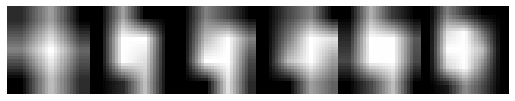

In [476]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(6):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28, 28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

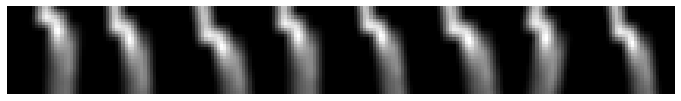

In [477]:
# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(8):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
epochs = 1000
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
historys = model.fit_generator(datagen.flow(X_train2,Y_train2, batch_size = 15),
    epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
    validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose = 2)
print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(0+1,epochs,max(historys.history['accuracy']), max(historys.history['val_accuracy']) ))

In [488]:
results = np.zeros( (X_test.shape[0],10) ) 
results = results + model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,10),name = "ImageId"),results],axis = 1)
submission.drop([0], inplace=True)
submission

,ImageId,Label
1,2,5
2,3,4
3,4,1
4,5,0
5,6,6
6,7,2
7,8,7
8,9,3


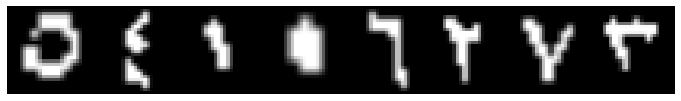

In [459]:
plt.figure(figsize=(15,4.5))
for i in range(1, 9):  
    plt.subplot(3, 10, i+1)
    plt.imshow(cv2.resize(num[i][2], (28, 28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

0
1
0
6
2
7


In [ ]:
maximum = 0
for k in numbers.keys():
  for i in numbers[k]:
    result = cv2.matchTemplate(nine, i, cv2.TM_CCOEFF_NORMED)
    (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
    if max_val > maximum:
      maximum = max_val
      resultNumb = k
print(k)

In [ ]:
for k in numbers.keys():
  maximum = 0
  for i in numbers[k]:
    ret, i = cv2.threshold(i, 127, 255, cv2.THRESH_BINARY)
    result = cv2.matchTemplate(nums, i, cv2.TM_CCOEFF)
    (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
    if max_val > maximum:
      maximum = max_val
      resultNumb = k
  if maximum > 1400000:
    print(k)

In [202]:
maximum = 0
for k in numbers.keys():
  for i in numbers[k]:
    result = cv2.matchTemplate(nine, i, cv2.TM_CCOEFF_NORMED)
    (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
    if max_val > maximum:
      maximum = max_val
      resultNumb = k
print(k)

9


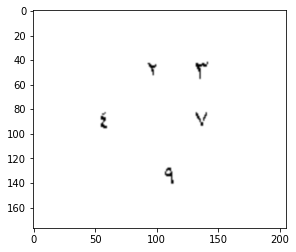

In [234]:
nums = cv2.imread('/content/nums.jpg')
nums = cv2.cvtColor(nums, cv2.COLOR_BGR2GRAY)
ret, nums = cv2.threshold(nums, 127, 255, cv2.THRESH_BINARY)
plt.imshow(nums, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [249]:
for k in numbers.keys():
  maximum = 0
  for i in numbers[k]:
    ret, i = cv2.threshold(i, 127, 255, cv2.THRESH_BINARY)
    result = cv2.matchTemplate(nums, i, cv2.TM_CCOEFF)
    (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
    if max_val > maximum:
      maximum = max_val
      resultNumb = k
  if maximum > 1400000:
    print(k)

2
3
4
7
9
